In [7]:
import cv2
import numpy as np
from PIL import Image


In [8]:
#read in the image
image=cv2.imread("sam1.jpg")   
#resizing because opencv does not work well with bigger images
image=cv2.resize(image,(800,800)) 
base=image.copy()

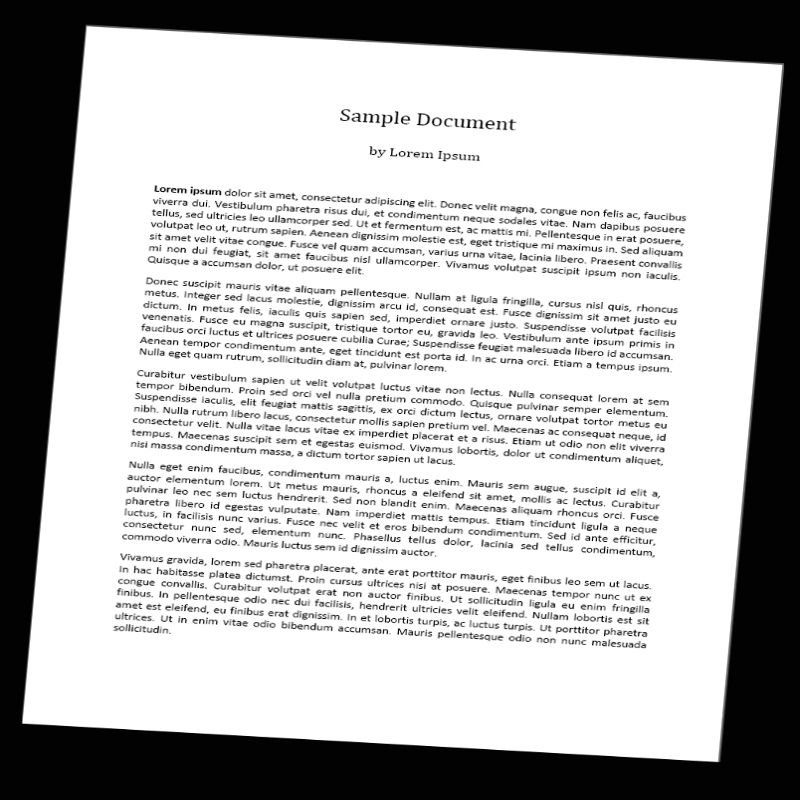

In [9]:
#RGB To Gray Scale
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)  
# cv2.imshow("Title",gray)
Image.fromarray(gray)


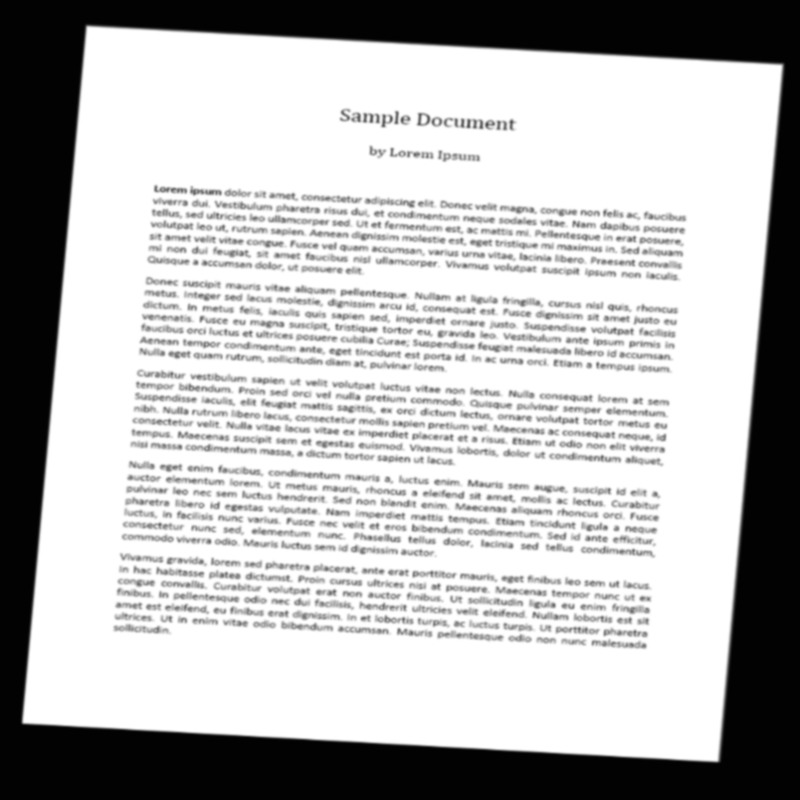

In [10]:
#(5,5) is the kernel size and 0 is sigma that determines the amount of blur
blur=cv2.GaussianBlur(gray,(5,5),0)  
Image.fromarray(blur)


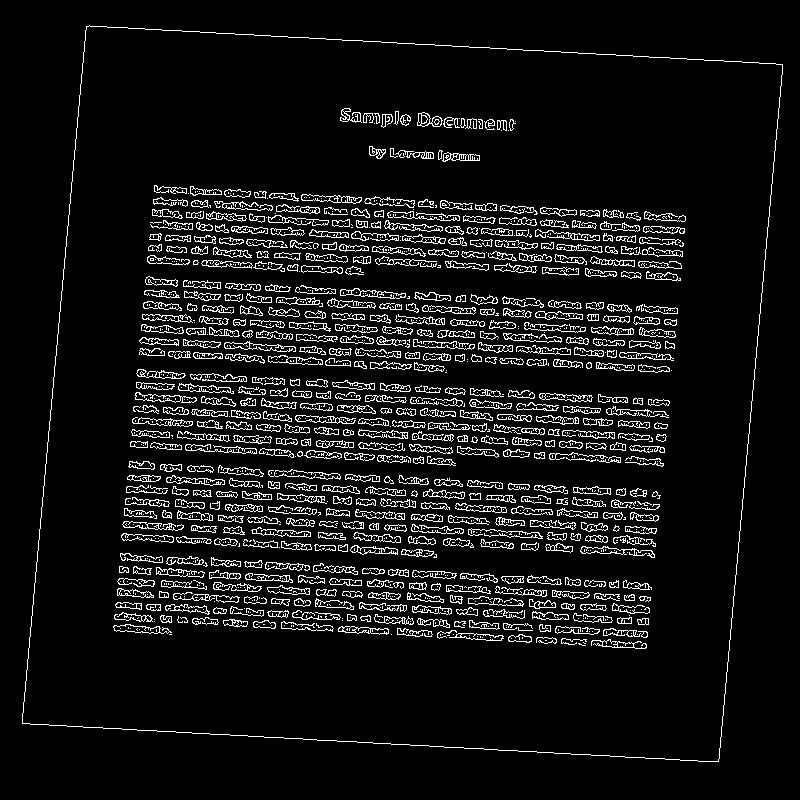

In [11]:
# Edge detection
#30 MinThreshold and 50 is the MaxThreshold
edge=cv2.Canny(blur,30,50)  
Image.fromarray(edge)



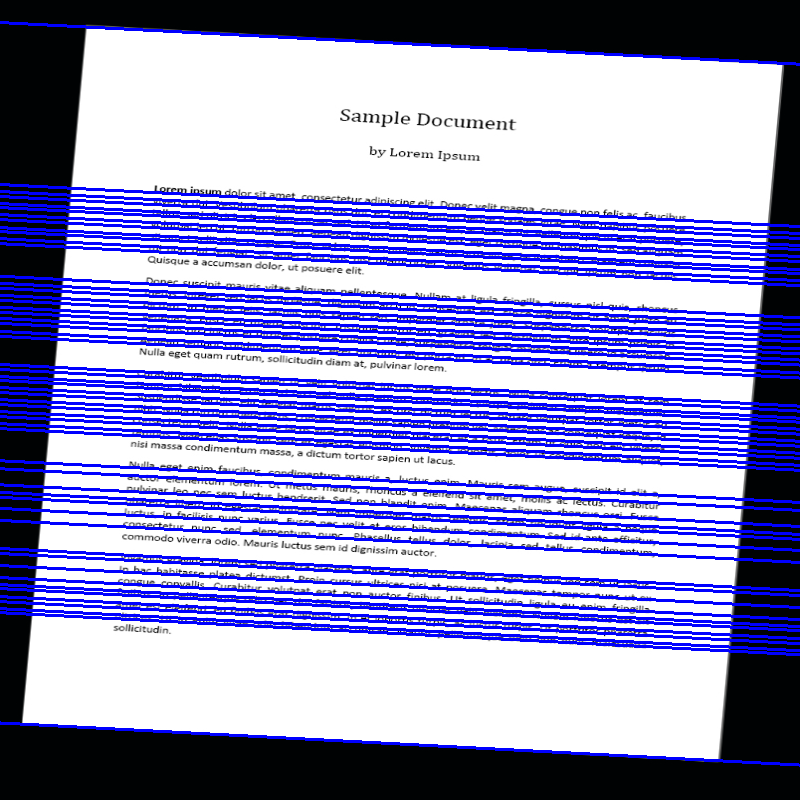

In [36]:
# Hough transform -  to find straight LINES in it
lined = base.copy() 

lines = cv2.HoughLines(edge, 1, np.pi / 180, 220)

for line in lines:
    rho,theta = line[0]
    a = np.cos(theta)
    b = np.sin(theta)
    x0 = a * rho
    y0 = b * rho
    # x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
    x1 = int(x0 + 1000 * (-b))
    # y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
    y1 = int(y0 + 1000 * (a))
    # x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
    x2 = int(x0 - 1000 * (-b))
    # y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
    y2 = int(y0 - 1000 * (a))
    cv2.line(lined, (x1, y1), (x2, y2), (0, 0, 255), 2)

Image.fromarray(lined)


In [32]:
line = lines[3]
rho,theta = line[0]
a = np.cos(theta)
b = np.sin(theta)
x0 = a * rho
y0 = b * rho
# x1 stores the rounded off value of (r * cos(theta) - 1000 * sin(theta))
x1 = int(x0 + 1000 * (-b))
# y1 stores the rounded off value of (r * sin(theta)+ 1000 * cos(theta))
y1 = int(y0 + 1000 * (a))
# x2 stores the rounded off value of (r * cos(theta)+ 1000 * sin(theta))
x2 = int(x0 - 1000 * (-b))
# y2 stores the rounded off value of (r * sin(theta)- 1000 * cos(theta))
y2 = int(y0 - 1000 * (a))
cv2.line(lined, (x1, y1), (x2, y2), (0, 0, 255), 2)
# cv2.minAreaRect()
import math
angle = math.degrees(math.atan2(y2 - y1, x2 - x1))
angle

3.011280870311824

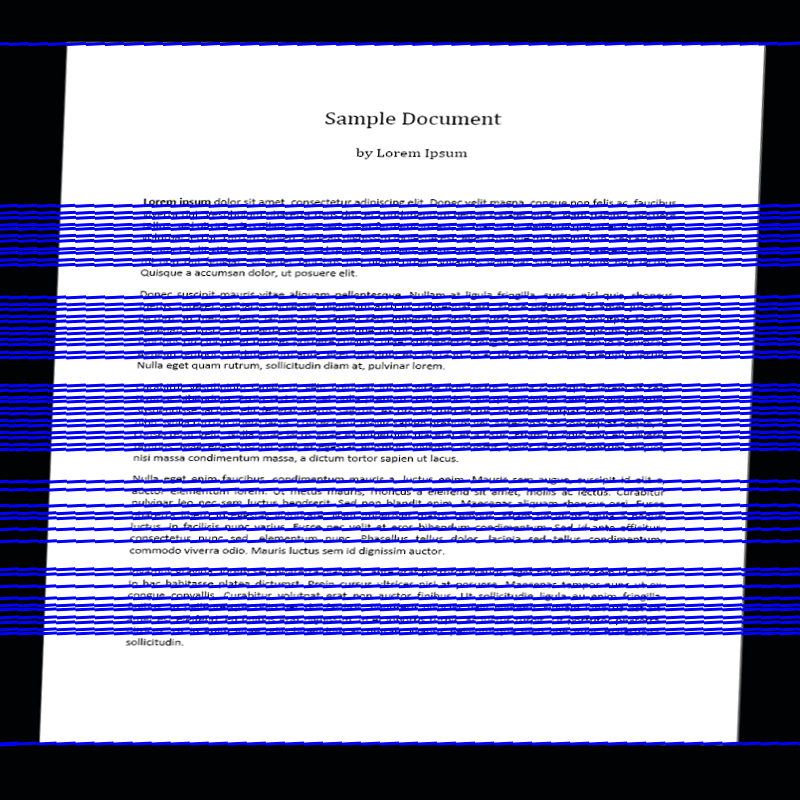

In [33]:
# rotate the image to deskew it
image=lined
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)

Image.fromarray(rotated)

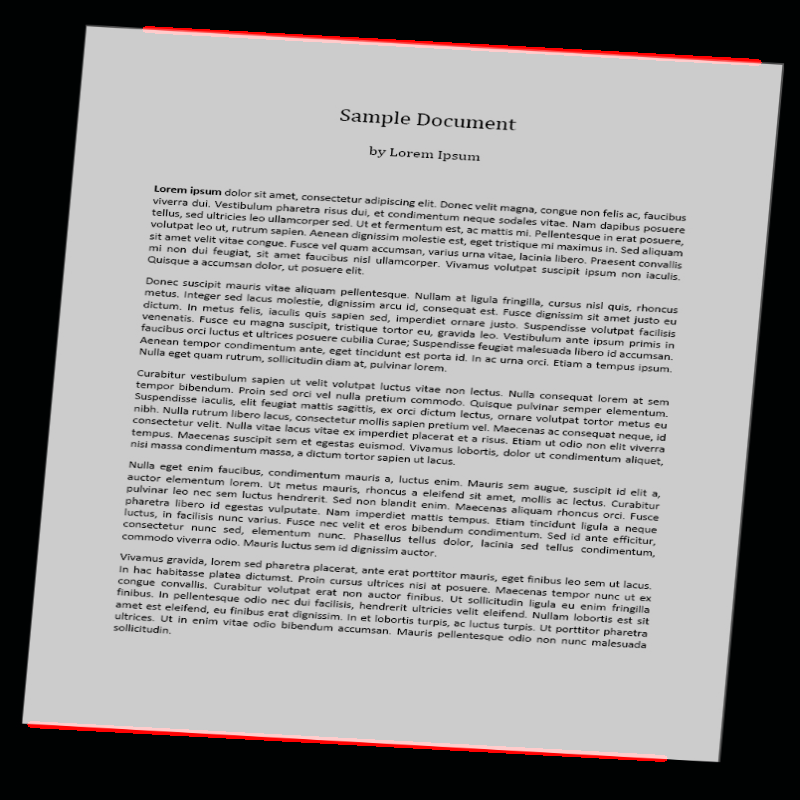

In [57]:
rho = 1  # distance resolution in pixels of the Hough grid
theta = np.pi / 180  # angular resolution in radians of the Hough grid
threshold = 15  # min number of votes (intersections in Hough grid cell)
min_line_length = 600  # min number of pixels making up a line
max_line_gap = 20  # max gap in pixels between connectable line segments
line_image = np.copy(base) * 0  # creating a blank to draw lines on

# %%  Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments

lines = cv2.HoughLinesP(edge, rho, theta, threshold, np.array([]),
                        min_line_length, max_line_gap)

if lines is not None:
    for line in lines:
        for x1, y1, x2, y2 in line:
            cv2.line(line_image, (x1, y1), (x2, y2), (255, 0, 0), 5)

# %% Draw the lines on the  image
lines_edges = cv2.addWeighted(base, 0.8, line_image, 1, 0)
Image.fromarray(lines_edges)


In [58]:
# # 2 biggest widest
# base_img = cv2.imread('a.png')

# img = cv2.cvtColor(base_img, cv2.COLOR_BGR2GRAY)
# ret, img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
# img = cv2.bitwise_not(img)

# cnts, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

# # sort the cnts bigger width first
# cnts.sort(key=lambda c: cv2.boundingRect(c)[2], reverse=True)

# # get the 2 big lines
# lines = [cv2.boundingRect(cnts[0]), cv2.boundingRect(cnts[1])]
# # higher line first
# lines.sort(key=lambda c: c[1])
# # croping the img
# crop_img = base_img[lines[0][1]:lines[1][1]]

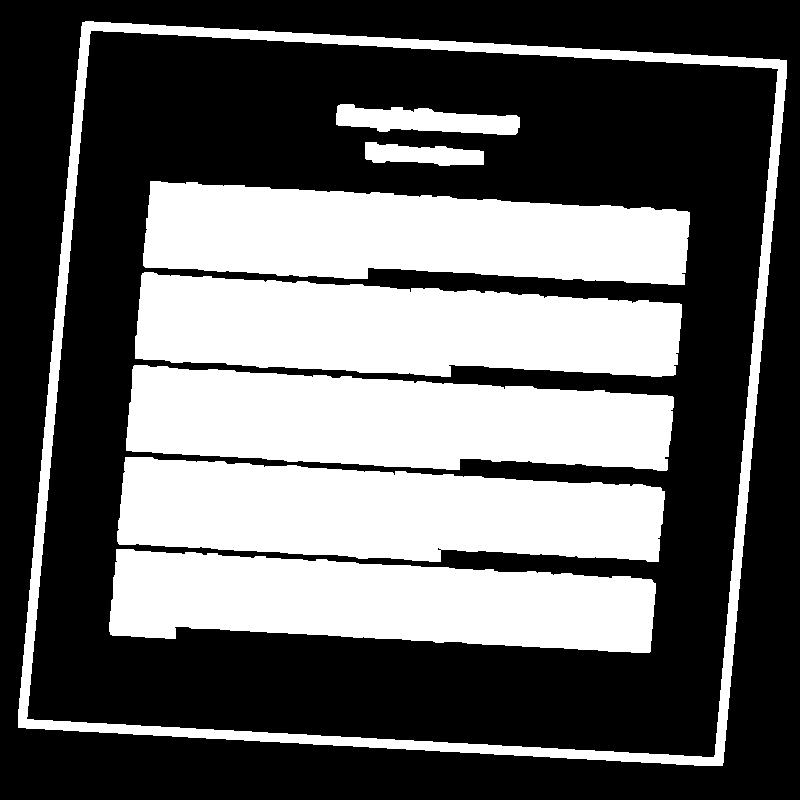

In [59]:
kernel = np.ones((5, 5))
# APPLY DILATION
# With this procedure, the areas of bright regions grow in size and hence the image size increases.
imgDial = cv2.dilate(edge, kernel, iterations=2) 
Image.fromarray(imgDial)


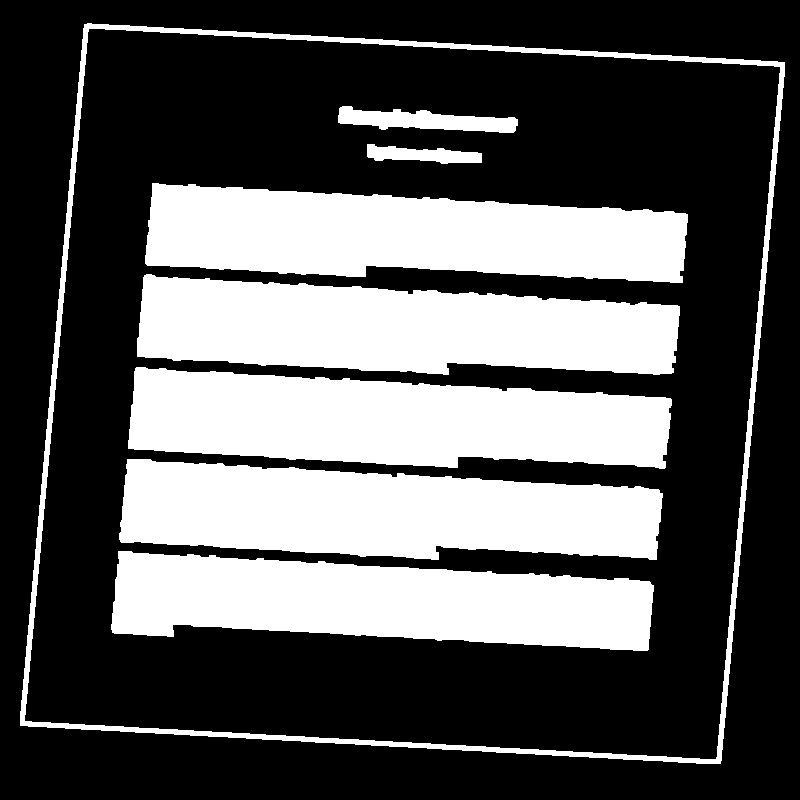

In [60]:
# APPLY EROSION
# With this procedure, the areas of dark regions grow in size and bright regions reduce.
imgThreshold = cv2.erode(imgDial, kernel, iterations=1) 
Image.fromarray(imgThreshold)


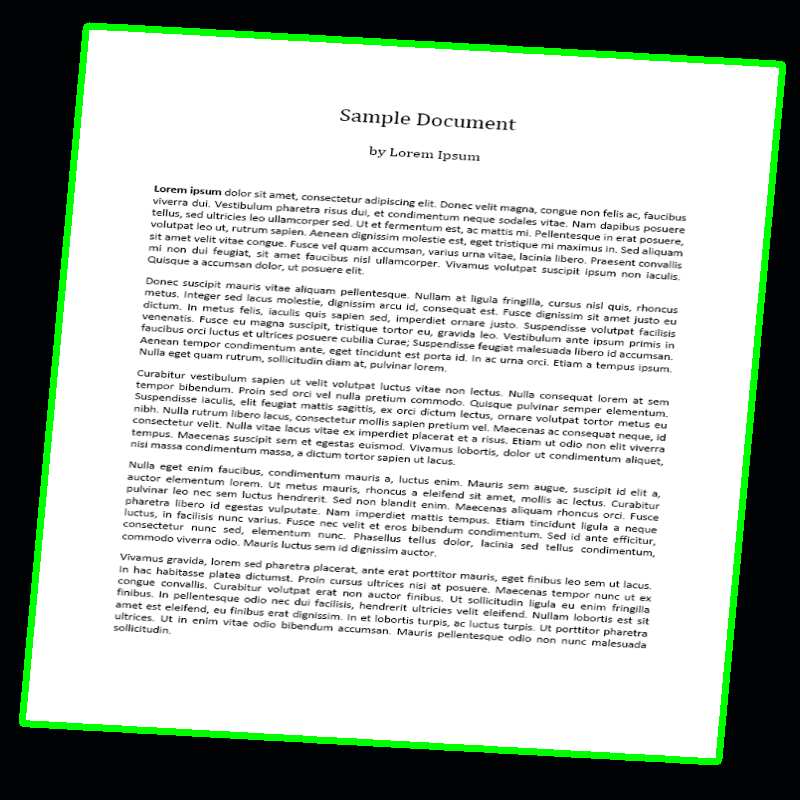

In [72]:
# FIND ALL CONTOURS
contours, hierarchy = cv2.findContours(edge, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE) 
# DRAW ALL DETECTED CONTOURS
imgContours = base.copy() 
# -1 signifies drawing all contours
cv2.drawContours(imgContours, contours, -1, (0, 255, 0), 5) 
Image.fromarray(imgContours)


In [ ]:
# FIND THE BIGGEST CONTOUR

contours,hierarchy=cv2.findContours(edge,cv2.RETR_LIST,cv2.CHAIN_APPROX_SIMPLE)  
#retrieve the contours as a list, with simple apprximation model
contours=sorted(contours,key=cv2.contourArea,reverse=True)

#the loop extracts the boundary contours of the page
for c in contours:
    p=cv2.arcLength(c,True)
    approx=cv2.approxPolyDP(c,0.02*p,True)

    if len(approx)==4:
        biggest=approx
        break

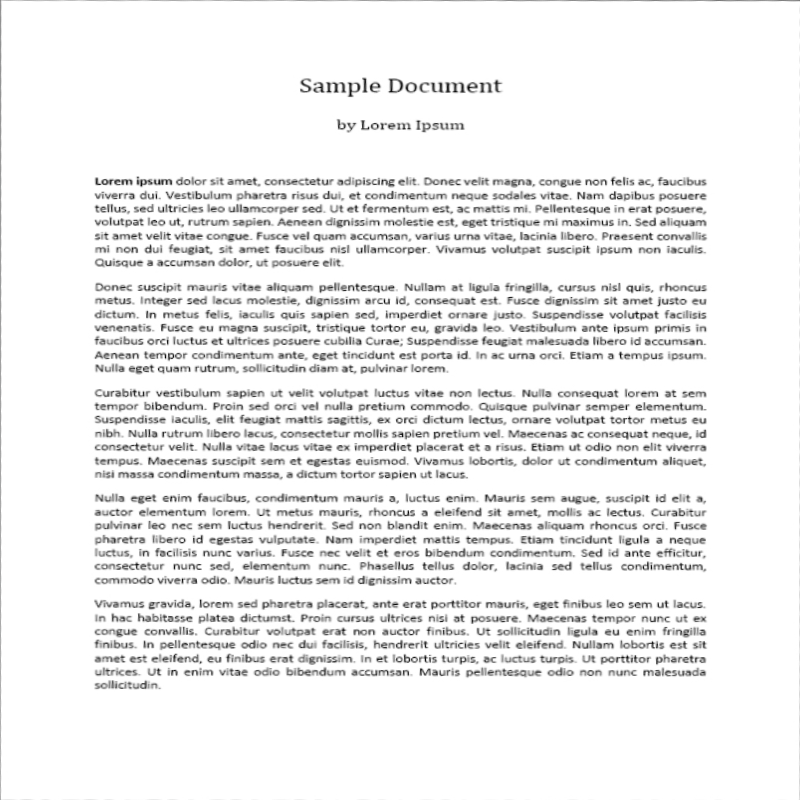

In [ ]:
def find_corners(h):
    h = h.reshape((4,2))
    hnew = np.zeros((4,2),dtype = np.float32)

    add = h.sum(1)
    hnew[0] = h[np.argmin(add)]
    hnew[2] = h[np.argmax(add)]

    diff = np.diff(h,axis = 1)
    hnew[1] = h[np.argmin(diff)]
    hnew[3] = h[np.argmax(diff)]

    return hnew

#find endpoints of the sheet
approx=find_corners(biggest) 

#map to 800*800 target window
pts=np.float32([[0,0],[800,0],[800,800],[0,800]])  

#get the top or bird eye view effect
op=cv2.getPerspectiveTransform(approx,pts)  
final=cv2.warpPerspective(base,op,(800,800))

Image.fromarray(final)


In [ ]:
# SAVE
cv2.imwrite("myImage.jpg",final)


True

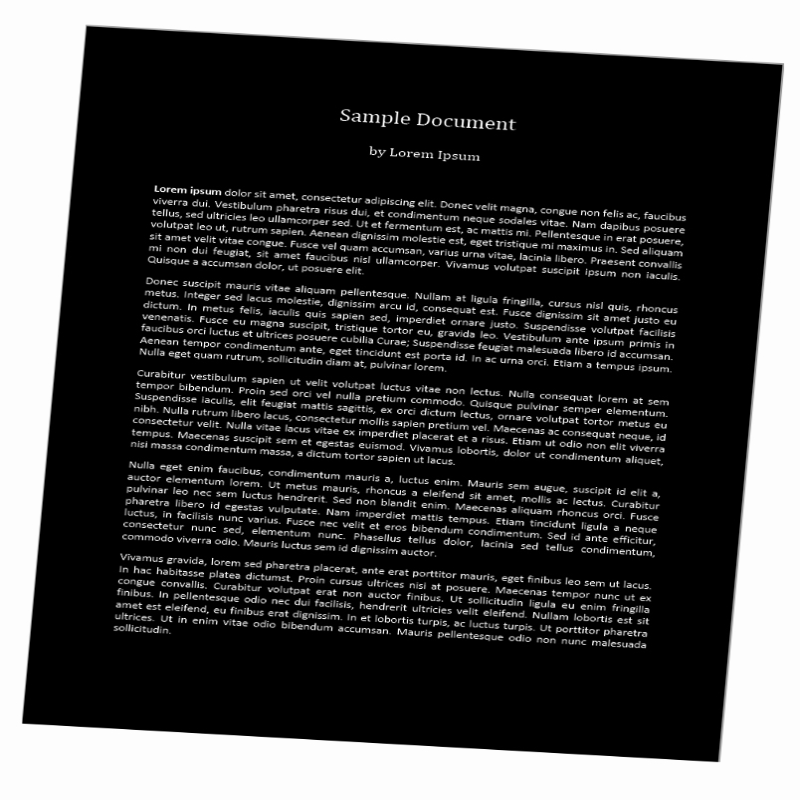

In [15]:
# convert the image to grayscale 
# and flip the foreground and background to ensure foreground is now "white" and the background is "black"
negative = cv2.bitwise_not(gray)

Image.fromarray(negative)


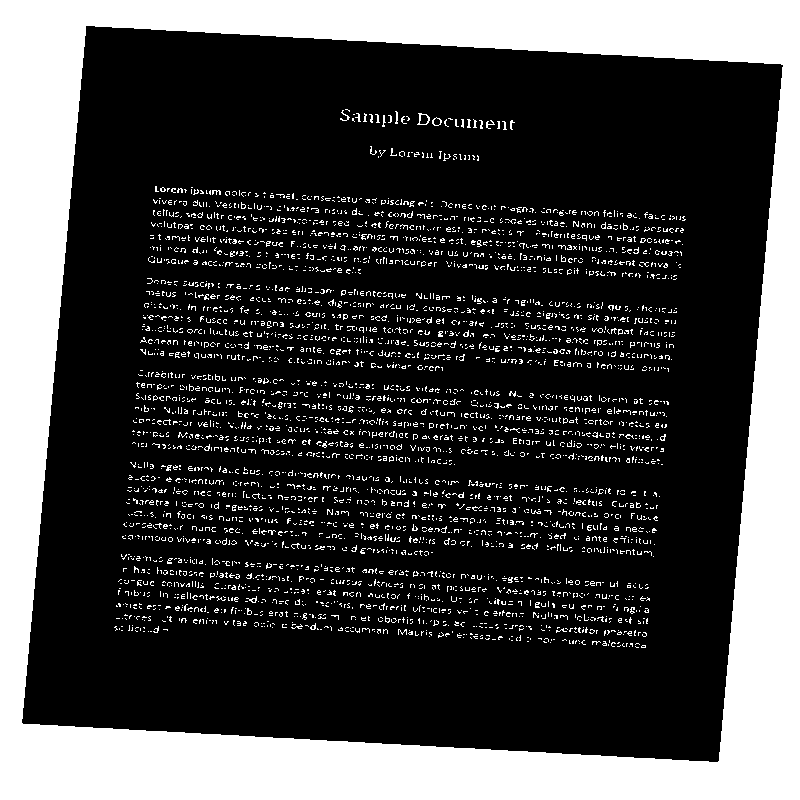

In [16]:

# threshold the image, setting all foreground pixels to
# 255 and all background pixels to 0
thresh = cv2.threshold(negative, 0, 255,
	cv2.THRESH_BINARY | cv2.THRESH_OTSU)[1]

Image.fromarray(thresh)


In [22]:
# grab the (x, y) coordinates of all pixel values that are greater than zero, 
coords = np.column_stack(np.where(thresh > 0))


((399.5, 399.5), (799.0, 799.0), 90.0)

In [46]:
# then use these coordinates to compute a rotated bounding box that contains all coordinates
rect = cv2.minAreaRect(coords)
angle = rect[-1]

# the `cv2.minAreaRect` function returns values in the range [-90, 0]
# as the rectangle rotates clockwise the returned angle trends to 0 - in this special case weneed to add 90 degrees 
if angle < -45:
	angle = -(90 + angle)
else:
	# otherwise, just take the inverse of the angle to makeit positive
	angle = -angle

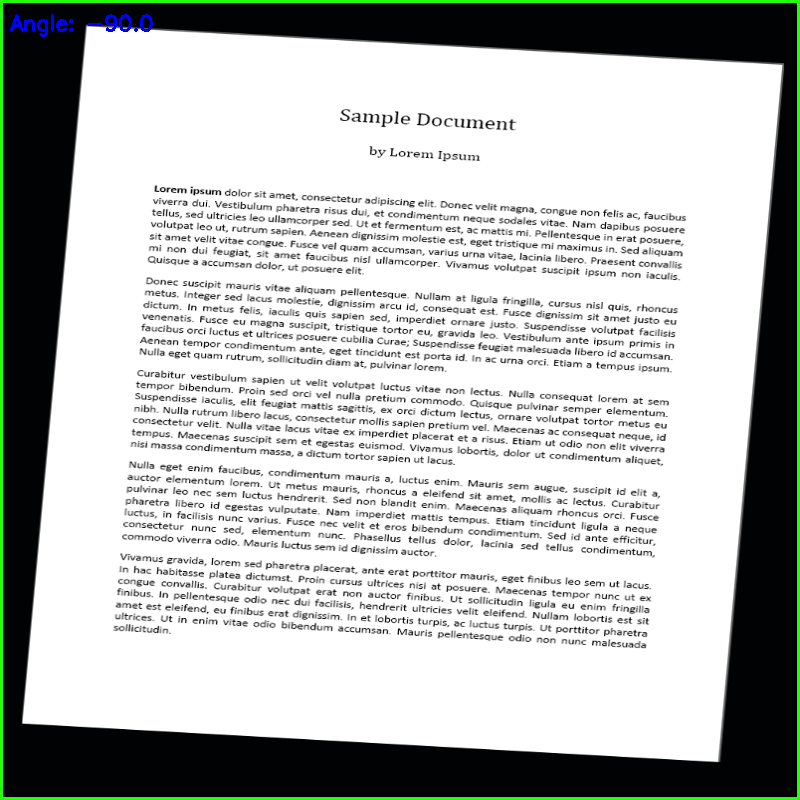

In [49]:
imgRectangle = base.copy() 

# draw the correction angle on the image so we can validate it
cv2.putText(imgRectangle, f"Angle: {angle}", (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

# cv2.rectangle(imgRectangle,tl,br,(0,255,0),3)
box = np.intp(cv2.boxPoints(rect))
cv2.drawContours(imgRectangle, [box], 0, (36,255,12), 3)

Image.fromarray(imgRectangle)

In [18]:

# rotate the image to deskew it
(h, w) = image.shape[:2]
center = (w // 2, h // 2)

M = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated = cv2.warpAffine(image, M, (w, h), flags=cv2.INTER_CUBIC, borderMode=cv2.BORDER_REPLICATE)


[INFO] angle: -90.000


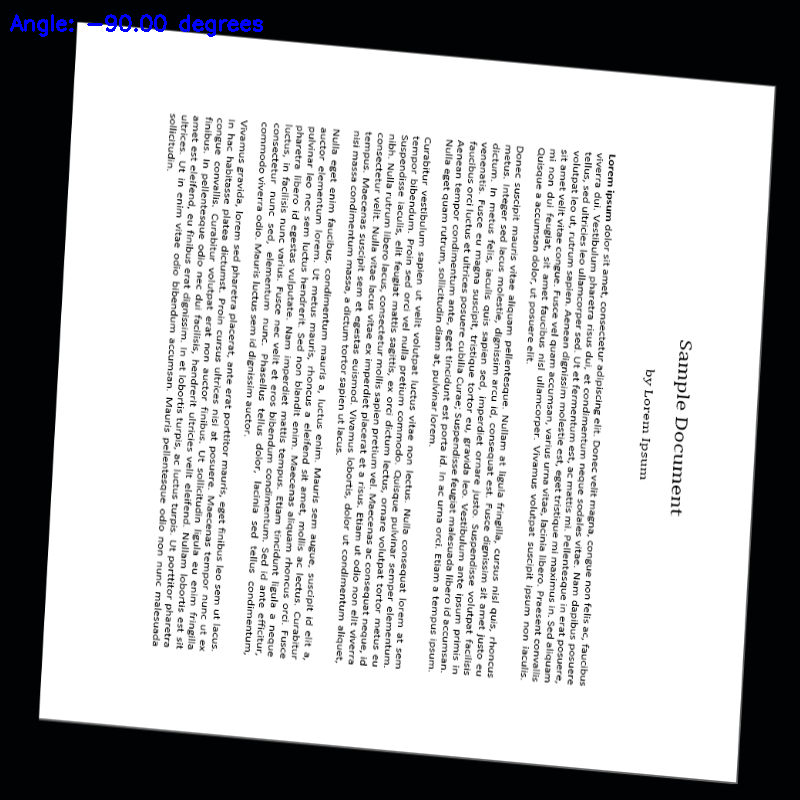

In [19]:
# show the output image
print("[INFO] angle: {:.3f}".format(angle))
Image.fromarray(rotated)
